In [ ]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# Google Drive path where project material is available
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Dissertation'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['accepted_2013_to_2018_filtered.csv', 'FINAL_unbalancedData.csv', 'Final_balanced_data.csv', 'Cleaned_data.csv', 'accepted_2013_to_2018_latest1.csv', 'accepted_2013_to_2018_latest.csv', 'accepted_2007_to_2018q4.csv.zip', 'XGBoost_model.ipynb', 'Cleaned_data_dummy.csv', 'NN_Keras.ipynb', '3_Filter Individual_loans_EDA_ and_cleaning.ipynb', 'y_data.csv', 'x_data.csv', 'Copy of Individual_loans_hypothesisTesting.ipynb', 'FINAL_balancedData.csv', 'FINAL_forModeling.csv', 'Model_3_Random_Forest.ipynb', 'ANN_model.joblib', 'Decsion_tree_model.joblib', 'Model_5_ANN.ipynb', 'Random_fores.joblib', '4_Individual_loans_hypothesisTesting_and_undersampling.ipynb', 'FINAL_balancedData_testing.csv', 'XGBoost_model.joblib', 'XAI_RandomForest.ipynb', '2_Filter_data_on_Loan_status.ipynb', 'Random_forest_model.ipynb', 'Model_2_Decesion_Tree.ipynb', 'Copy of 3_Filter Individual_loans_EDA_ and_cleaning.ipynb', 'Untitled0.ipynb', 'Model_4_XGBoost.ipynb', '1_Filter_data_2013_to_2018.ipynb', 'Model_1_Logisti

In [ ]:
#Import required libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  confusion_matrix,roc_curve, auc, classification_report,roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
import joblib

In [ ]:
#Read dependent variable 'y' and independent variable 'X'
X = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, 'x_data.csv'))
y = pd.read_csv(os.path.join(GOOGLE_DRIVE_PATH, 'y_data.csv'))

In [ ]:
y.value_counts() #distribution of classes 1 for 'Default' and 0 for fully paid loans

,count
loan_status,
0,733482
1,371676


In [ ]:
#to display all features and observations
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#Split the data into train as test
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, stratify = y, random_state = 129)

In [ ]:
#Assign waights for handling class imbalance
loan_distribution = y_train.value_counts(normalize=True)
# default weught wrt to fully paid loan weight
default_weight = loan_distribution[0] / loan_distribution[1]
print(f"default_weight: {default_weight}") #print default weight

default_weight: 1.9734412677700015


In [ ]:
lr_model= LogisticRegression(class_weight={0: 1, 1: default_weight}, random_state=49) #Define logistic regression model

In [ ]:
#define Grid
param_grid = {
    'C': [0.5, 0.8, 0.9,1]
    }

In [ ]:
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid,
                          verbose=2, n_jobs=-1, cv=5) #define Grid search in model

In [ ]:
grid_search.fit(x_train, y_train) #performing grid search on 5 fold cross validation

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight={0: 1,
                                                        1: 1.9734412677700015},
                                          random_state=49),
             n_jobs=-1, param_grid={'C': [0.5, 0.8, 0.9, 1]}, verbose=2)

In [ ]:
grid_search.best_estimator_ #display best model hyperparameters

LogisticRegression(C=0.8, class_weight={0: 1, 1: 1.9734412677700015},
                   random_state=49)

In [ ]:
best_model_lr= grid_search.best_estimator_ #load the best hyperparameter in model

In [ ]:
pred= best_model_lr.predict(x_test) #best model predictions

In [ ]:
#Using new features from Random Forest
Accuracy_score = best_model_lr.score(x_test, y_test) #Calculate best model accuracy
print(Accuracy_score)

0.6521906330305114


In [ ]:
#Print classification report
print("Classification Report of Logistic Regression:")
print(classification_report(y_test, pred))

Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.78      0.66      0.72    146697
           1       0.49      0.64      0.55     74335

    accuracy                           0.65    221032
   macro avg       0.64      0.65      0.63    221032
weighted avg       0.68      0.65      0.66    221032



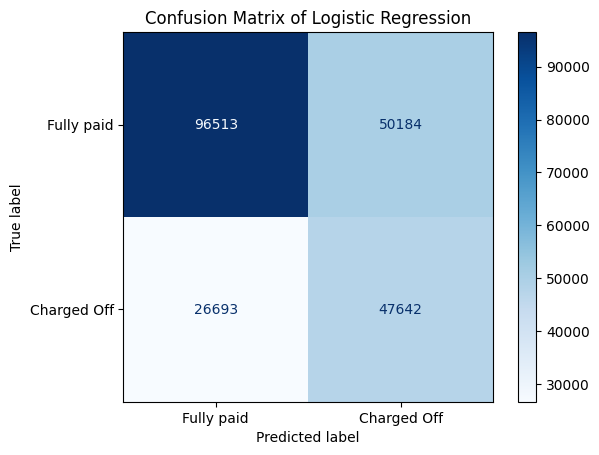

In [ ]:
cm_lr = confusion_matrix(y_test, pred)
display_cm = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Fully paid', 'Charged Off'])
display_cm.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

In [ ]:
# predictions to calculate performance metrices
y_train_pred_lr = best_model_lr.predict(x_train)
y_test_pred_lr = best_model_lr.predict(x_test)
y_test_pred_proba_lr = best_model_lr.predict_proba(x_test)[:, 1]

# performance metrices
train_accuracy = accuracy_score(y_train, y_train_pred_lr)
test_accuracy = accuracy_score(y_test, y_test_pred_lr)
precision = precision_score(y_test, y_test_pred_lr)
recall = recall_score(y_test, y_test_pred_lr)
f1 = f1_score(y_test, y_test_pred_lr)
auc = roc_auc_score(y_test, y_test_pred_proba_lr)

# Print performance results
print(f"Train Accuracy of Logistic Regression: {train_accuracy*100}")
print(f"Test Accuracy of Logistic Regression: {test_accuracy*100}")
print(f"Precision of Logistic Regression: {precision*100}")
print(f"Recall of Logistic Regression: {recall *100}")
print(f"F1 Score of Logistic Regression: {f1*100}")
print(f"AUC of Logistic Regression: {auc *100}")

Train Accuracy of Logistic Regression: 65.13268470783576
Test Accuracy of Logistic Regression: 65.21906330305114
Precision of Logistic Regression: 48.700754400670576
Recall of Logistic Regression: 64.09093966502994
F1 Score of Logistic Regression: 55.34586811182556
AUC of Logistic Regression: 70.65191696580784


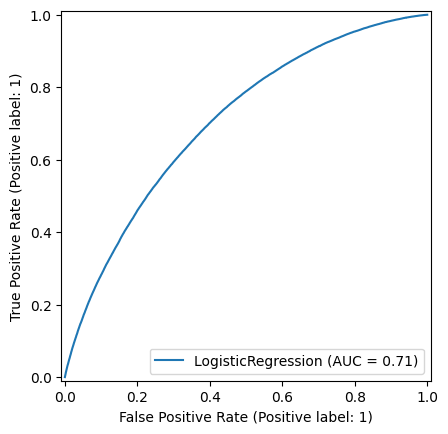

In [ ]:
#Display ROC curve for logistic regression
RocCurveDisplay.from_estimator(best_model_lr, x_test, y_test)

In [ ]:
#_------------------------------------------------------Interpretebility of LR------------------------------------------------------------------

In [ ]:
x_train[['Verified', 'Source Verified', 'Not Verified']].corr()
# there is no issue with multicollinearity in them, LR is unable to capture categorical and shows high coeficient, other categorical features like MORTGAGE works okay

,Verified,Source Verified,Not Verified
Verified,1.000000,-0.504582,-0.386528
Source Verified,-0.504582,1.000000,-0.469972
Not Verified,-0.386528,-0.469972,1.000000


In [ ]:
X = sm.add_constant(x_train)  # add constant to the independent variable
lr_model = sm.Logit(y_train, X).fit() #explain model using stats model on default values, as it is directly not possible to achive coeficient and marginal effect so using default parameters for explanations

         Current function value: 0.511796
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
#print model summary
print(lr_model.summary())

                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:               884126
Model:                          Logit   Df Residuals:                   884105
Method:                           MLE   Df Model:                           20
Date:                Sun, 06 Oct 2024   Pseudo R-squ.:                  0.1985
Time:                        16:42:55   Log-Likelihood:            -4.5249e+05
converged:                      False   LL-Null:                   -5.6457e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     21.1113     79.877      0.264      0.792    -135.445     177.668
int_rate                   0.0043      0.002      1.747      0.081      -0.001       0.009
sub_

In [ ]:
# print the odd ratios
odds_ratios_lr = np.exp(lr_model.params)
print("Odd Ratios are :")
print(odds_ratios_lr)


Odd Ratios are :
const                     1.474128e+09
int_rate                  1.004263e+00
sub_grade                 1.089462e+00
term_years                1.301466e+00
inq_last_6mths            9.977359e-01
grade                     9.151347e-01
mths_since_last_delinq    1.000008e+00
num_tl_op_past_12m        9.890922e-01
Not Verified              1.054577e-09
acc_open_past_24mths      1.040698e+00
MORTGAGE                  6.585873e-01
fico_score                9.952283e-01
num_rev_tl_bal_gt_0       9.980845e-01
emp_length_years          9.982784e-01
Source Verified           1.292437e-09
mths_since_last_record    1.000006e+00
num_actv_rev_tl           1.027998e+00
pub_rec                   1.004853e+00
Verified                  1.319115e-09
mths_since_recent_inq     9.924163e-01
mort_acc                  9.380859e-01
dtype: float64


In [ ]:
# Calculate average marginal effects
marginal_effects = lr_model.get_margeff()
print(f'Marignal effects of Default Logistic regression model are: {marginal_effects.summary()}')


Marignal effects of Default Logistic regression model are:         Logit Marginal Effects       
Dep. Variable:            loan_status
Method:                          dydx
At:                           overall
                            dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
int_rate                   0.0007      0.000      1.747      0.081   -8.88e-05       0.002
sub_grade                  0.0147      0.000     33.239      0.000       0.014       0.016
term_years                 0.0452      0.001     82.408      0.000       0.044       0.046
inq_last_6mths            -0.0004      0.001     -0.687      0.492      -0.001       0.001
grade                     -0.0152      0.002     -9.862      0.000      -0.018      -0.012
mths_since_last_delinq  1.362e-06   9.74e-07      1.398      0.162   -5.48e-07    3.27e-06
num_tl_op_past_12m        -0.0019      0.000     -5.176      

In [ ]:
#---------------------------------test the saved model------------------------------------------

In [ ]:
#Save Best Model:
joblib.dump(best_model_lr, 'drive/My Drive/Dissertation/Logistic_Regression.joblib')

['drive/My Drive/Dissertation/Logistic_Regression.joblib']

In [ ]:
#Load the best saved model
loaded_lr_model = joblib.load('drive/My Drive/Dissertation/Logistic_Regression.joblib')

In [ ]:
#make predictions
y_testing = loaded_lr_model.predict(x_test)

In [ ]:
accuracy_score(y_test, y_testing)

0.6521906330305114

In [ ]:
#-------------------------------------------------------End-------------------------------------------------------------------